In [118]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

In [40]:
data = pd.read_csv('World Happiness Report Project.csv')

In [41]:
data.shape

(158, 12)

In [42]:
data.count()

Country                          158
Region                           158
Happiness Rank                   158
Happiness Score                  158
Standard Error                   158
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         158
Freedom                          158
Trust (Government Corruption)    158
Generosity                       158
Dystopia Residual                158
dtype: int64

In [43]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [45]:
data.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [47]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


List the 10 happiest countries

In [48]:
list_Ten_Happiest = data.sort_values(by = 'Happiness Rank')

list_Ten_Happiest.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


List the 10 least happy countries

In [49]:
list_Ten_LeastHappy = data.sort_values(by = 'Happiness Rank', ascending = False)

list_Ten_LeastHappy.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296


In [50]:
data.Region.unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [51]:
data.Country.unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

In [52]:
Western_Europe_df = data[data['Region'] == 'Western Europe']

Austra_New_Zea_df = data[data['Region'] == 'Australia and New Zealand']

Middle_East_North_Africa_df = data[data['Region'] == 'Middle East and Northern Africa']

w_Europe_df = data[data['Region'] == 'Western Europe']

L_America_Caribbean_df = data[data['Region'] == 'Latin America and Caribbean']

n_America_df = data[data['Region'] == 'North America']

Southeastern_Asia_df = data[data['Region'] == 'Southeastern Asia']

Central_East_Europe_df = data[data['Region'] == 'Central and Eastern Europe']

Eastern_Asia_df = data[data['Region'] == 'Eastern Asia']

Sub_Saharan_Africa_df = data[data['Region'] == 'Sub-Saharan Africa']

Southern_Asia_df = data[data['Region'] == 'Southern Asia']



Compute the mean happiness score for each region and rank the regions from most happy to least happy

In [53]:
data_mean = data.groupby(['Region'])[['Happiness Score']].mean()

data_mean.sort_values(by = 'Happiness Score', ascending = False)

,Happiness Score
Region,
Australia and New Zealand,7.285000
North America,7.273000
Western Europe,6.689619
Latin America and Caribbean,6.144682
Eastern Asia,5.626167
Middle East and Northern Africa,5.406900
Central and Eastern Europe,5.332931
Southeastern Asia,5.317444
Southern Asia,4.580857


Compute the number of countries in each region that have a happiness score above 6.0

In [54]:
happinest_6 = data.loc[(data['Happiness Score'])>6]

# Counting by region
happinest_6 = happinest_6.groupby(['Region'])[['Happiness Score']].count()

happinest_6.sort_values(by = 'Happiness Score', ascending = False)

,Happiness Score
Region,
Western Europe,16
Latin America and Caribbean,13
Middle East and Northern Africa,6
Australia and New Zealand,2
Central and Eastern Europe,2
North America,2
Southeastern Asia,2
Eastern Asia,1


Compute the difference between the maximum and minimum happiness score for each region. Which region has the largest range of happiness scores?

In [55]:
r_max_min = data.groupby(['Region'])[['Happiness Score']].max()-data.groupby(['Region'])[['Happiness Score']].min()

r_max_min.sort_values(by = 'Happiness Score', ascending = False)

,Happiness Score
Region,
Middle East and Northern Africa,4.272
Southeastern Asia,2.979
Western Europe,2.730
Latin America and Caribbean,2.708
Sub-Saharan Africa,2.638
Central and Eastern Europe,2.287
Southern Asia,1.678
Eastern Asia,1.424
North America,0.308


In [19]:
#Renaming the columns name
df = data.rename(columns={'Happiness Score':'Happiness_Score', 'Happiness Rank':'Happiness_Rank', 'Standard Error':'Standard_Error', 'Economy (GDP per Capita)':'Economy_GDP','Health (Life Expectancy)':'Health','Trust (Government Corruption)':'Trust', 'Dystopia Residual':'Dystopia'})

df.head()

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy_GDP,Family,Health,Freedom,Trust,Generosity,Dystopia
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

Correlation between the Happiness Score and each of the other variables

In [61]:
list1=['Happiness vs Economy', 
       'Happiness vs Family',
       'Happiness vs Health',
       'Happiness vs Freedom',
       'Happiness vs Generosity',
       'Happiness vs Dystopia' ]

# Column of correlation
h_e = np.corrcoef(df.Happiness_Score, df.Economy_GDP )[0,1]
h_f = np.corrcoef(df.Happiness_Score, df.Family )[0,1]
h_h = np.corrcoef(df.Happiness_Score, df.Health )[0,1]
h_fr = np.corrcoef(df.Happiness_Score, df.Freedom )[0,1]
h_g = np.corrcoef(df.Happiness_Score, df.Generosity )[0,1]

h_d = np.corrcoef(df.Happiness_Score, df.Dystopia )[0,1]

list2=[h_e,h_f,h_h,h_fr,h_g,h_d]

In [62]:
Corr = {'':list1,'Correlation':list2}
df_c = pd.DataFrame(Corr)
df_c

,,Correlation
0,Happiness vs Economy,0.780966
1,Happiness vs Family,0.740605
2,Happiness vs Health,0.724200
3,Happiness vs Freedom,0.568211
4,Happiness vs Generosity,0.180319
5,Happiness vs Dystopia,0.530474


In [65]:
Total_o_6 = df[(df.Happiness_Score > 6)].count()
Total_over_6 = Total_o_6.Happiness_Score

# Countries with a Happiness score over 6.0 and Western Europe

Austra_New_Zea_df = df[(df.Happiness_Score > 6) & (df.Region == 'Australia and New Zealand')].count()
Austra_New_Zea = Austra_New_Zea_df.Happiness_Score

pro = (Austra_New_Zea/Total_over_6)*100

print('The probability of randomly select a country with happiness score over 6.0 is {:.2f} %'.format(pro))

The probability of randomly select a country with happiness score over 6.0 is 4.55 %


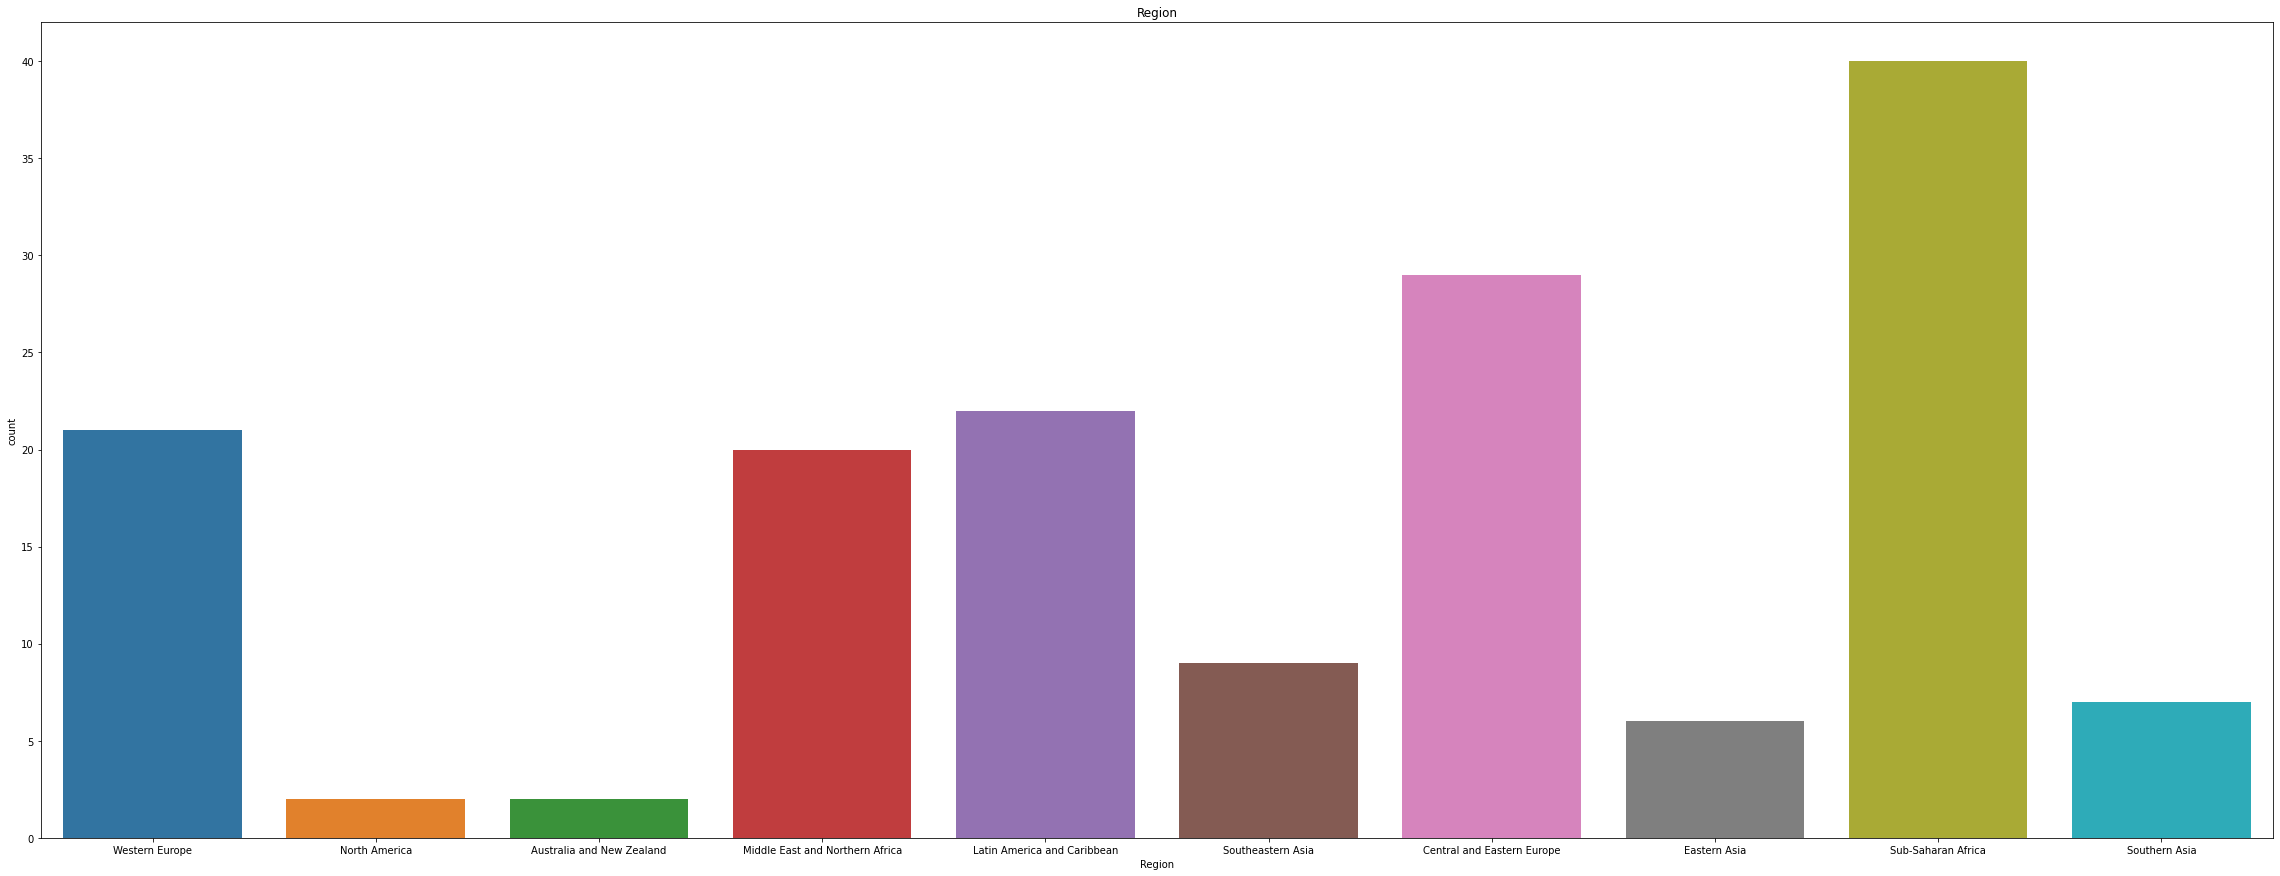

In [73]:
plt.figure(figsize=(40,15))
sns.countplot(x ='Region', data=df)
plt.title("Region")
plt.show()

In [74]:
df['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [79]:
df['Country'].value_counts()

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64

In [107]:
#encoding the categorical features : region
df.replace({'Region':{'Sub-Saharan Africa':0,'Central and Eastern Europe': 1, 'Latin America and Caribbean':2, 'Western Europe':3, 'Middle East and Northern Africa':4, 'Southeastern Asia':5, 'Southern Asia':6, 'Eastern Asia':7, 'North America':8, 'Australia and New Zealand':9}}, inplace=True)

In [ ]:
df.drop(columns = 'Country', inplace=True)

In [109]:
X = df.drop(columns='Happiness_Score', axis=1)
Y = df['Happiness_Score']

In [110]:
print(X)

     Region  Happiness_Rank  Standard_Error  Economy_GDP   Family   Health  \
0         3               1         0.03411      1.39651  1.34951  0.94143   
1         3               2         0.04884      1.30232  1.40223  0.94784   
2         3               3         0.03328      1.32548  1.36058  0.87464   
3         3               4         0.03880      1.45900  1.33095  0.88521   
4         8               5         0.03553      1.32629  1.32261  0.90563   
..      ...             ...             ...          ...      ...      ...   
153       0             154         0.03464      0.22208  0.77370  0.42864   
154       0             155         0.03656      0.28665  0.35386  0.31910   
155       4             156         0.05015      0.66320  0.47489  0.72193   
156       0             157         0.08658      0.01530  0.41587  0.22396   
157       0             158         0.06727      0.20868  0.13995  0.28443   

     Freedom    Trust  Generosity  Dystopia  
0    0.66557  0.4

In [111]:
print(Y)

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness_Score, Length: 158, dtype: float64


In [112]:
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [113]:
print(X.shape, X_train.shape, Y_train.shape)

(158, 10) (126, 10) (126,)


In [114]:
reg = LinearRegression()


In [115]:
reg.fit(X_train, Y_train)

LinearRegression()

In [122]:
training_data_predicaiton = reg.predict(X_train)

In [124]:
r2_test = metrics.r2_score(Y_train, training_data_predicaiton)
r2_test

0.9999999383396421

In [125]:
training_data_predicaiton = reg.predict(X_test)

In [126]:
r2_test = metrics.r2_score(Y_test, training_data_predicaiton)
r2_test

0.9999999490265908

In [127]:
input_data= ( 3, 1, 0.03411, 1.39651, 1.34951, 0.94143, 0.66557, 0.41978, 0.29678, 2.51738 )
input_as_numpy= np.asarray(input_data)
input_data_reshaped= input_as_numpy.reshape(1,-1)
predication= reg.predict(input_data_reshaped)
print("Happiness Score is ", predication[0])

Happiness Score is  7.586860377749837
